# Data Finding : Ford GoBike System Data
## by Faisal Abdulaziz AlFaqih

### Table of Contents:

    1. Introduction
    2. Preliminary Wrangling
    3. Univariate Exploration
    4. Bivariate Exploration
    5. Multivariate Exploration

## Preliminary Wrangling

> This data set had information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.The source data (Ford GoBike System Data) is available at : https://www.fordgobike.com/system-data. This dataset will require some data wrangling in order to make it tidy for analysis.


The Features included in the Data are as follows :

- Member Year of Birth
- Member Gender
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Trip Duration(in seconds)
- Bike ID
- Start Time and Date
- End Time and Date
- Start Station ID
- End Station ID
- Start Station Name
- End Station Name
- End Station Latitude
- End Station Longitude
- Start Station Latitude
- Start Station Longitude

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
print(df.shape)

(183412, 16)


In [10]:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [11]:
df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [6]:
print(df.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [12]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


# Data wrangling

-  changing  dtypes problems to deal with it easily.

In [16]:
df.user_type = df.user_type.astype('category')

In [15]:
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)

In [14]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

- add some needed columns to make an accurate relations

In [18]:
df['month'] = df.start_time.dt.strftime('%b')
df['day'] = df.start_time.dt.strftime('%a')
df['hour'] = df.start_time.dt.strftime('%H')

# clean the data

- drop not wanted columns

In [19]:
df.drop(axis=1, columns=['start_time','end_time'], inplace=True)

In [26]:
df.head(30)

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,hour
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Feb,Thu,17
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Feb,Thu,18
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Feb,Thu,12
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Feb,Thu,17
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Feb,Thu,23
5,1793,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Feb,Thu,23
6,1147,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,Feb,Thu,23
7,1615,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,Feb,Thu,23
8,1570,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,Feb,Thu,23
9,1049,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,Feb,Thu,23


In [27]:
df.tail(30)

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,hour
183382,961,95.0,Sanchez St at 15th St,37.766219,-122.431060,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1565,Subscriber,1988.0,Male,No,Feb,Fri,00
183383,434,274.0,Oregon St at Adeline St,37.857567,-122.267558,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,4541,Customer,1997.0,Male,No,Feb,Fri,00
183384,184,316.0,San Salvador St at 1st St,37.330165,-121.885831,298.0,Oak St at 1st St,37.322125,-121.881090,4044,Subscriber,1991.0,Male,No,Feb,Fri,00
183385,400,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,337.0,Webster St at 19th St,37.806970,-122.266588,3487,Subscriber,1945.0,Male,Yes,Feb,Fri,00
183386,425,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,245.0,Downtown Berkeley BART,37.870139,-122.268422,1377,Subscriber,1998.0,Male,Yes,Feb,Fri,00
183387,598,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,245.0,Downtown Berkeley BART,37.870139,-122.268422,2055,Subscriber,1999.0,Male,Yes,Feb,Fri,00
183388,490,61.0,Howard St at 8th St,37.776513,-122.411306,81.0,Berry St at 4th St,37.775880,-122.393170,5411,Subscriber,1927.0,Male,No,Feb,Fri,00
183389,184,66.0,3rd St at Townsend St,37.778742,-122.392741,47.0,4th St at Harrison St,37.780955,-122.399749,4960,Subscriber,1985.0,Other,No,Feb,Fri,00
183390,232,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,266.0,Parker St at Fulton St,37.862464,-122.264791,3756,Subscriber,1999.0,Male,No,Feb,Fri,00
183391,269,119.0,18th St at Noe St,37.761047,-122.432642,85.0,Church St at Duboce Ave,37.770083,-122.429156,5540,Subscriber,1980.0,Male,Yes,Feb,Fri,00


In [23]:
print(df.shape)

(183412, 17)


In [24]:
print(df.describe())

        duration_sec  start_station_latitude  start_station_longitude  \
count  183412.000000           183412.000000            183412.000000   
mean      726.078435               37.771223              -122.352664   
std      1794.389780                0.099581                 0.117097   
min        61.000000               37.317298              -122.453704   
25%       325.000000               37.770083              -122.412408   
50%       514.000000               37.780760              -122.398285   
75%       796.000000               37.797280              -122.286533   
max     85444.000000               37.880222              -121.874119   

       end_station_latitude  end_station_longitude  member_birth_year  
count         183412.000000          183412.000000      175147.000000  
mean              37.771427            -122.352250        1984.806437  
std                0.099490               0.116673          10.116689  
min               37.317298            -122.453704    

In [25]:
print(df.dtypes)

duration_sec                  int64
start_station_id             object
start_station_name           object
start_station_latitude      float64
start_station_longitude     float64
end_station_id               object
end_station_name             object
end_station_latitude        float64
end_station_longitude       float64
bike_id                      object
user_type                  category
member_birth_year           float64
member_gender                object
bike_share_for_all_trip      object
month                        object
day                          object
hour                         object
dtype: object


### What is the structure of your dataset?

> As conveyed earlier, the current data set of interest comprises of 12 'csv' files, representing each month of the year; structured through 183412 Records spanning over 17 Features.

### What is/are the main feature(s) of interest in your dataset?

> from my opinion an important variables is the duration of the trip in seconds.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  most of features in the dataset can help my investigation, However I can see that the Variables that will help my investigation the most are : User type , Start Date and End time.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> - Exploring counts of trips in a week, dose the weekends have more trips rather than the weekday or not  ?

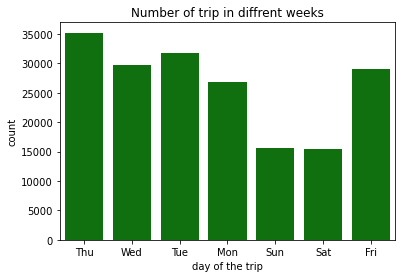

In [40]:
sb.countplot(data=df, x='day', color= 'green' );
plt.xlabel('day of the trip')
plt.title('Number of trip in diffrent weeks');

> as we can see above, Most of them take a trip in the weekday not in the weekend. so we can see in Sunday and Saturday number of trip less than any other day in week. 

- Exploring how much time spent on the bike in SEC?

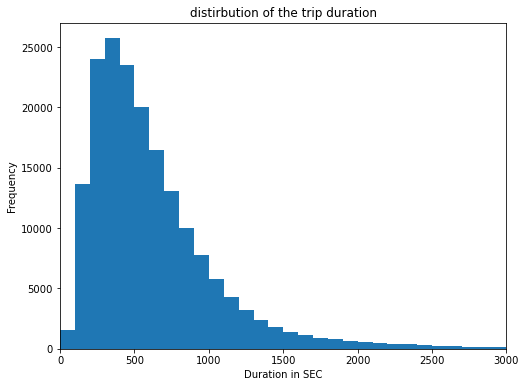

In [33]:
binss = np.arange(0, df['duration_sec'].max()+100, 100);
plt.figure(figsize = [8,6])
plt.hist(data = df, x = 'duration_sec', bins = binss)
plt.xlim(0,3000)

plt.title("distirbution of the trip duration")
plt.xlabel("Duration in SEC")
plt.ylabel("Frequency")
plt.show();

The most Frequency duration is around 400, However Visualizing the above plot was extremely difficult due to the above plot is right-screwed, with a long tail on the right. So, i will change the duration in minutes and see if it possible to explore it more. 


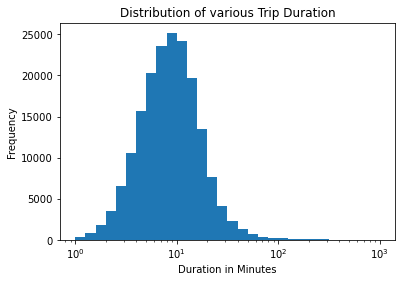

In [35]:
# Converting the trip durations from seconds to minutes 

df['duration_min'] = df['duration_sec'] / 60


binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_min' , bins = binedges);
plt.xticks(ticks,labels);
plt.title('Distribution of various Trip Duration')
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency')
plt.xscale('log');

1. Moat of the bike drivers have a ability using the bikes for a short-time durational trips (around 10 mins).



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration_trip was skweed to the right and had many ponts; a scale transformation was requred. Most points were (under 20 mins)
The days of the week had more trip than weekends. but it's obvious that after the weakend the number of trip increased slowly to it's peek on Tuesday.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data was tidy , All of values are rights  and do not need any extra operations to make it clear.but I add three needed columns which are : Day , Month , and hour.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [44]:
customers = df.query('user_type == "Customer"')['bike_id'].count()
subscribers = df.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customers / df['bike_id'].count()
subscriber_prop = subscribers / df['bike_id'].count()

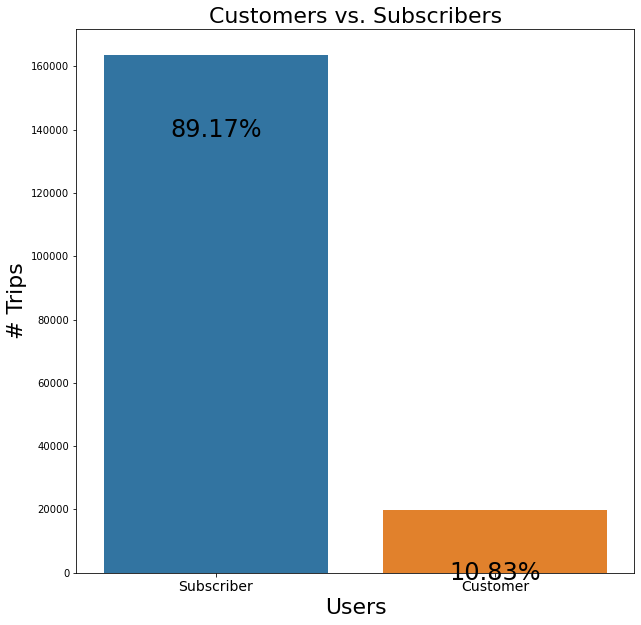

In [62]:
plt.figure(figsize=(10,10))
sb.countplot(data = df, x = "user_type", order = df['user_type'].value_counts().index);
plt.ylabel('# Trips',fontsize = 22)
plt.xlabel('Users',fontsize = 22)
plt.title('Customers vs. Subscribers',fontsize = 22)
plt.xticks(size=14);
plt.text(0, subscribers-20000,str(round(subscriber_prop*100,2))+'%', ha = 'center',va = 'top', color = 'black',fontsize = 24)
plt.text(1, customers-20000,str(round(customer_prop*100,2))+'%', ha = 'center',va = 'center', color = 'black',fontsize = 24);

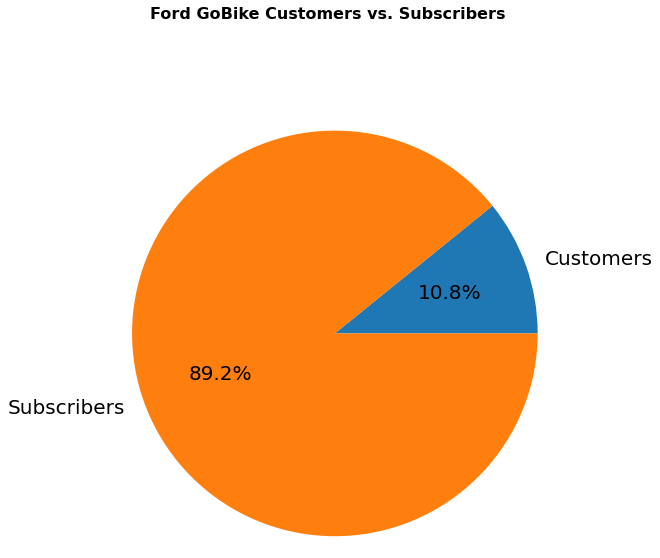

In [70]:
plt.figure(figsize = [8, 8])
labels = ['Customers', 'Subscribers']
size = [customer_prop, subscriber_prop]
plt.pie(size, labels = labels, autopct='%1.1f%%', textprops={'color':'black','size':20})
plt.axis('equal')
plt.suptitle('Ford GoBike Customers vs. Subscribers', y=1.07,
             fontsize=16, fontweight='bold');

> In last two figures we can see that , 89.2% of the user types in the Ford GoBikes sharing platform were Subscribers. 10.8% of the user types in the Ford GoBikes Sharing Platform were Customers.

-  Looking at the Member gender

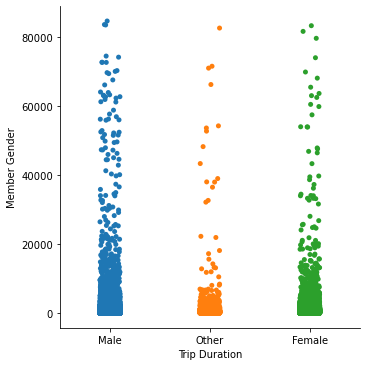

In [72]:
sb.catplot(x="member_gender", y="duration_sec", data=df)
plt.xlabel('Trip Duration')
plt.ylabel('Member Gender');

> we can see that, the male take more trips from the famale but its not that diffrent

- Can you investigate the relation between the daywise usage of bike in Second?

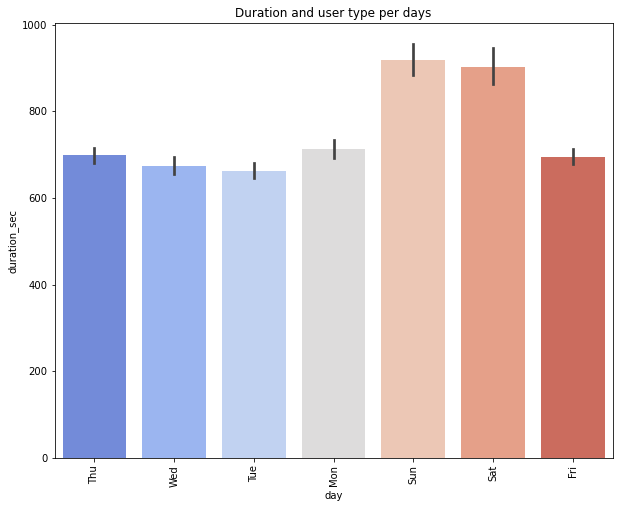

In [79]:
plt.figure(figsize = [10, 8])
sb.barplot(data = df, x = 'day', y = 'duration_sec', palette = 'coolwarm')
plt.xticks(rotation=90)
plt.title('Duration and user type per days');
plt.show()

>   in sunday and saturday the most days they uses the bike for more than 800 sec , the otherdays at usually used less than 800 sec.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1.  89.2% of the user types in the Ford GoBikes sharing platform were Subscribers. 10.8% of the user types in the Ford GoBikes Sharing Platform were Customers.
2. the male take more trips from the famale but its not that diffrent. 
3. in sunday and saturday the most days they uses the bike for more than 800 sec , the otherdays at usually used less than 800 sec.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 1. There is a strong relationship between sunday and saturday with the duration that means the bike is used at high level in specific days.
2.Almost 90% of the users are Subscribers 

## Multivariate Exploration


- What is the Distribution of trip duartion across user type in different days?


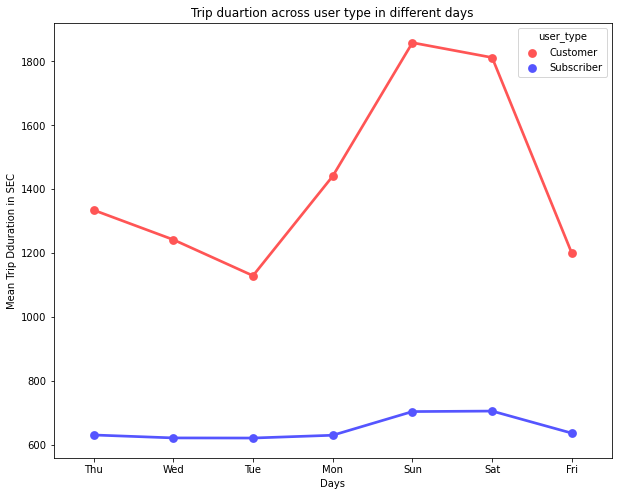

In [89]:
fig = plt.figure(figsize = [10,8])
sb.pointplot(data = df, x = 'day', y = 'duration_sec', hue = 'user_type', palette = 'seismic_r', ci=None)

plt.title('Trip duartion across user type in different days')
plt.ylabel('Mean Trip Dduration in SEC')
plt.xlabel('Days')
plt.show();

> As we investigate in the previous time, both customer and subscriber take more trip in the Sunday and Saturday, Also , the customer at least spend 1000 sec in the mean trip duration and in the other hand the subscriber the mean trip duration less than 700 sec.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> both customer and subscriber take more trip in the Sunday and Saturday.

### Were there any interesting or surprising interactions between features?

> the customer at least spend 1000 sec in the mean trip duration and in the other hand the subscriber the mean trip duration less than 700 sec.